# U.S. Medical Insurance Costs

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
data = pd.read_csv("/home/cacaprog/learning-projects/us-medical-insurance-cost/insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Investigate the costs for men and women

female_costs = data.charges[data.sex == 'female']
male_costs = data.charges[data.sex == 'male']
fem_costs_mean = np.mean(female_costs)
male_costs_mean = np.mean(male_costs)

print('The costs mean for men: $', np.round(male_costs_mean))
print('The costs mean for women: $', np.round(fem_costs_mean))
print('Female insurance costs are $', np.round(fem_costs_mean - male_costs_mean), 'cheapter than man\'s costs')

The costs mean for men: $ 13957.0
The costs mean for women: $ 12570.0
Female insurance costs are $ -1387.0 cheapter than man's costs


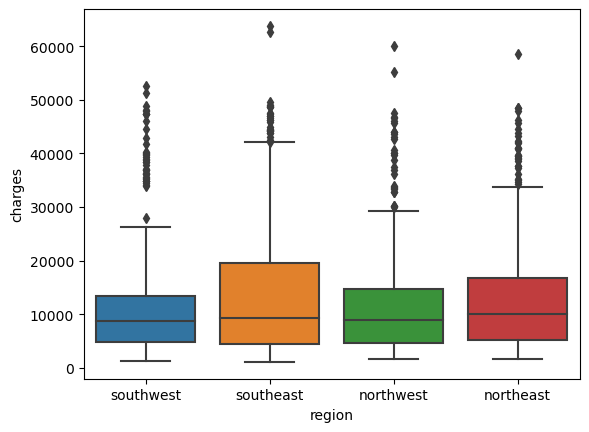

In [38]:
sns.boxplot(data = data, x = 'region', y = 'charges')
plt.show()

In [43]:
# Investigate the costs per region for smokers and no smokers

smoker = data[data.smoker == 'yes']
no_smoker = data[data.smoker == 'no']
smoker.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


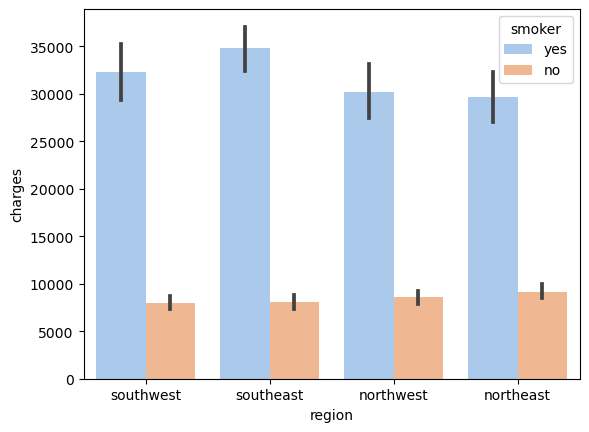

In [90]:
sns.barplot(x = 'region', y= 'charges', hue = 'smoker', data=data, palette='pastel')
plt.show()

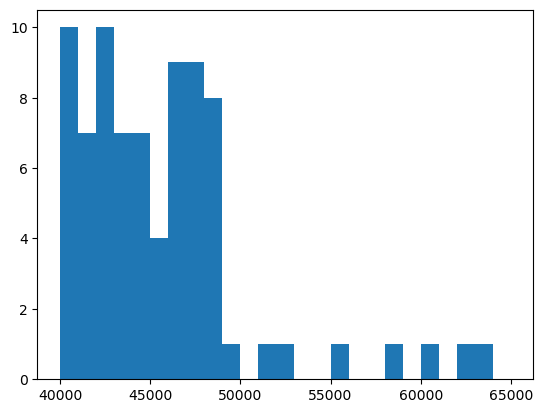

In [93]:
plt.clf()
plt.hist(data.charges, range=(40000, 65000), bins = 25)
plt.show()

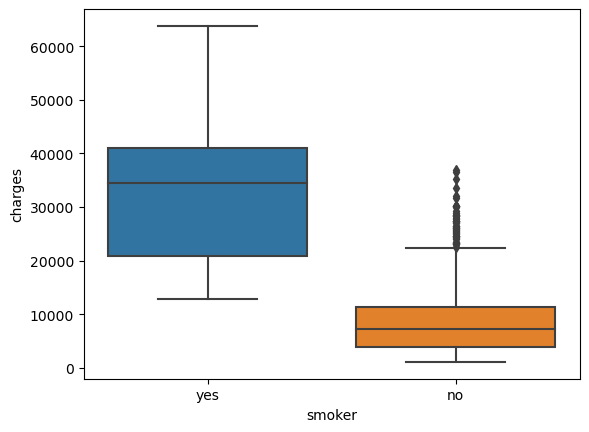

In [94]:
plt.clf()
sns.boxplot(data = data, x = 'smoker', y = 'charges')
plt.show()

In [64]:
# The mean for smokers by region

print('The mean for smokers on Southwest: $', np.round(np.mean(smoker.charges[smoker.region == 'southwest'])))
print('The mean for smokers on Southeast: $', np.round(np.mean(smoker.charges[smoker.region == 'southeast'])))
print('The mean for smokers on Northwest: $', np.round(np.mean(smoker.charges[smoker.region == 'northwest'])))
print('The mean for smokers on Northeast: $', np.round(np.mean(smoker.charges[smoker.region == 'northeast'])))

The mean for smokers on Southwest: $ 32269.0
The mean for smokers on Southeast: $ 34845.0
The mean for smokers on Northwest: $ 30192.0
The mean for smokers on Northeast: $ 29674.0


In [65]:
# The mean for non-smokers by region

print('The mean for non-smokers on Southwest: $', np.round(np.mean(no_smoker.charges[no_smoker.region == 'southwest'])))
print('The mean for non-smokers on Southeast: $', np.round(np.mean(no_smoker.charges[no_smoker.region == 'southeast'])))
print('The mean for non-smokers on Northwest: $', np.round(np.mean(no_smoker.charges[no_smoker.region == 'northwest'])))
print('The mean for non-smokers on Northeast: $', np.round(np.mean(no_smoker.charges[no_smoker.region == 'northeast'])))

The mean for non-smokers on Southwest: $ 8019.0
The mean for non-smokers on Southeast: $ 8032.0
The mean for non-smokers on Northwest: $ 8556.0
The mean for non-smokers on Northeast: $ 9166.0


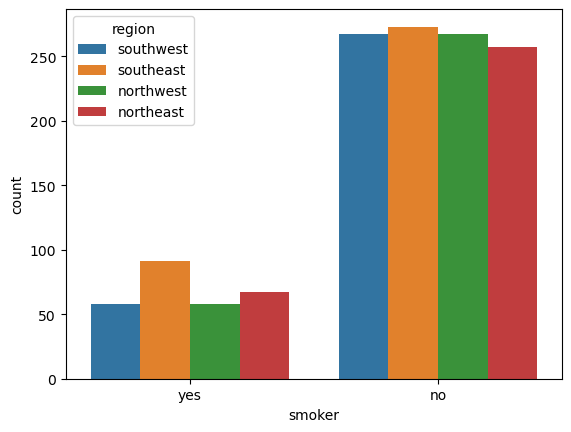

In [76]:
plt.clf()
sns.countplot(x = 'smoker', hue = 'region', data = data)
plt.show()

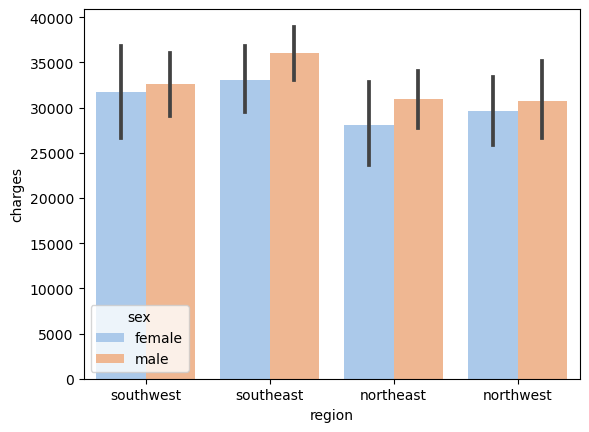

In [59]:
plt.clf()
sns.barplot(x = 'region', y= 'charges', hue = 'sex', data=smoker, palette='pastel')
plt.show()

In [ ]:
mean_charge_smoker = np.mean(smoker.charges)
mean_charge_no_smoker = np.mean(no_smoker.charges)

plt.clf()
plt.hist(x=)

print('The mean cost for smokers is $', np.round(mean_charge_smoker))
print('The mean cost for non smokers is $', np.round(mean_charge_no_smoker))
print(mean_charge_smoker / mean_charge_no_smoker)

southeast have the most expensive insurance cost

why?

southwest have the most cheaper insurance cost

why?

the mean for all the regions are aproximately $ 10.000

many outliers on all regions, it can affect the mean costs.

let´s check these outliers.

let´s check the distributions.

/home/cacaprog/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


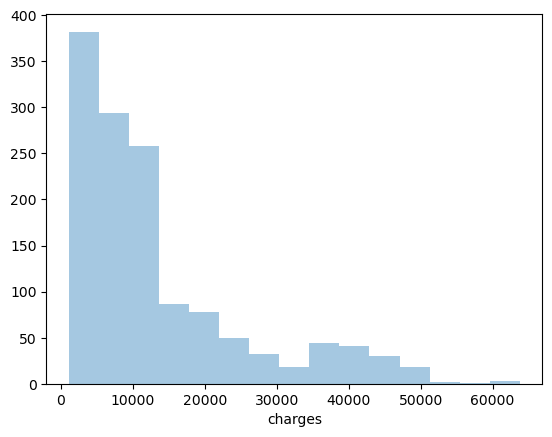

In [23]:
plt.clf()
sns.distplot(data.charges, bins = 15, kde=False)
plt.show()

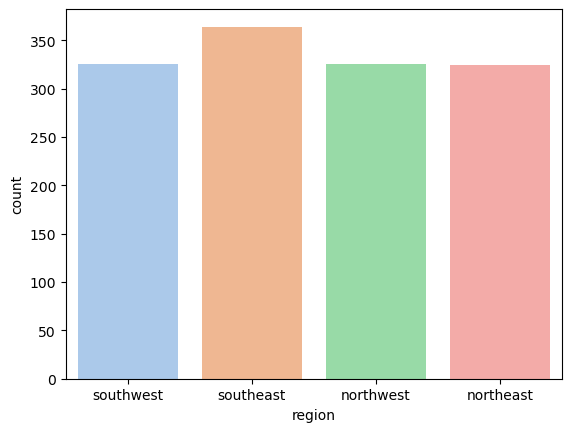

In [26]:
plt.clf()
sns.countplot(x='region', data=data, palette='pastel')
plt.show()

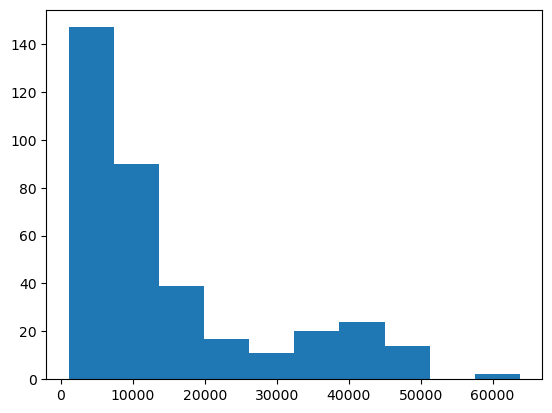

In [27]:
plt.clf()
plt.hist(x=data.charges[data.region == 'southeast'], bins = 10)
plt.show()

On Southeast we have outliers for charges between 55.000 and 65.000


In [35]:
southeast = data.groupby(data.region == 'southeast')
southeast.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
11,62,female,26.290,0,yes,southeast,27808.72510


In [37]:
southeast_expensive = southeast[southeast.charges > 55000]

TypeError: '>' not supported between instances of 'SeriesGroupBy' and 'int'